In [0]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [538]:
import os
os.getcwd()

'/content'

In [539]:
from google.colab import files
uploaded = files.upload()

Saving DataTB.zip to DataTB.zip


In [0]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['DataTB.zip']), 'r')
data.extractall()

In [551]:
data.printdir()

File Name                                             Modified             Size
DataTB/                                        2019-11-28 20:02:56            0
DataTB/test/                                   2019-11-28 20:01:04            0
DataTB/test/acgrodvqbr.jpg                     2019-11-28 19:59:46          596
DataTB/test/adafuefbzj.jpg                     2019-11-28 19:59:46          623
DataTB/test/aetlzwkwyy.jpg                     2019-11-28 19:59:46          542
DataTB/test/aexbsvvzah.jpg                     2019-11-28 19:59:46          543
DataTB/test/afejrxhxsr.jpg                     2019-11-28 19:59:46          605
DataTB/test/agggmywidz.jpg                     2019-11-28 19:59:46          577
DataTB/test/agzgbccdzu.jpg                     2019-11-28 19:59:46          594
DataTB/test/agzmizmyeb.jpg                     2019-11-28 19:59:46          565
DataTB/train/                                  2019-11-28 20:02:52            0
DataTB/train/aagfohyoru.jpg             

In [0]:
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt

In [553]:
from PIL import Image
from skimage import color
from skimage import io
x_test = []
files = glob.glob("/content/DataTB/test/*.jpg")
for myFile in files:
    print(myFile)
    image = color.rgb2gray(cv2.imread (myFile))
    x_test.append (image)

print('x_test shape:', np.array(x_test).shape)

/content/DataTB/test/aetlzwkwyy.jpg
/content/DataTB/test/agggmywidz.jpg
/content/DataTB/test/aexbsvvzah.jpg
/content/DataTB/test/acgrodvqbr.jpg
/content/DataTB/test/agzgbccdzu.jpg
/content/DataTB/test/agzmizmyeb.jpg
/content/DataTB/test/adafuefbzj.jpg
/content/DataTB/test/afejrxhxsr.jpg
x_test shape: (8, 28, 28)


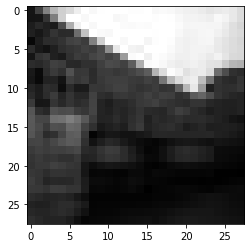

In [554]:
plt.imshow(x_test[2],cmap='gray')

In [555]:
from PIL import Image
from skimage import color
from skimage import io

x_train = []
files = glob.glob ("/content/DataTB/train/*.jpg")
for myFile in files:
    print(myFile)
    image = color.rgb2gray(cv2.imread (myFile))
    x_train.append(image)

print('x_train shape:', np.array(x_train).shape)

/content/DataTB/train/acelgpvmcb.jpg
/content/DataTB/train/aagfohyoru.jpg
/content/DataTB/train/abhhftuwpn.jpg
/content/DataTB/train/acfvtmktll.jpg
x_train shape: (4, 28, 28)


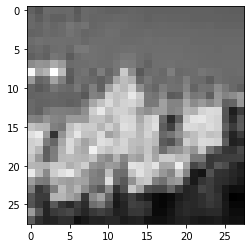

In [557]:
plt.imshow(x_train[1],cmap='gray')

In [0]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [0]:
train = x_train.reshape(4,784)
test = x_test.reshape(8,784)

In [0]:
from sklearn.preprocessing import normalize

train_norm = normalize(train,  norm='l2')
test_norm = normalize(test,  norm='l2')

In [0]:
train_ntrasp= train_norm.transpose()


In [565]:
train_ntrasp

array([[0.05109201, 0.02700961, 0.01610087, 0.04773081],
       [0.05514684, 0.02356179, 0.00516736, 0.04767657],
       [0.05772735, 0.02946795, 0.01201127, 0.0472291 ],
       ...,
       [0.02960694, 0.00586204, 0.00497957, 0.01399532],
       [0.02833407, 0.00476143, 0.00492764, 0.01348297],
       [0.02731578, 0.00506321, 0.004644  , 0.01348297]])

In [0]:
from numpy import matmul
matrix = matmul(test_norm, train_ntrasp)

In [0]:
from numpy import argsort
ranks= argsort(matrix, axis=1)[:,::-1]

In [568]:
from PIL import Image, ImageOps
# get the original images for visualization
x_train_images = x_train.reshape(4, 28, 28)
x_test_images = x_test.reshape(8, 28, 28)

h,w = (28, 28)
new_image= Image.new('RGB', (h*8,w*4))
print(np.shape(new_image))


(112, 224, 3)


(28, 28)


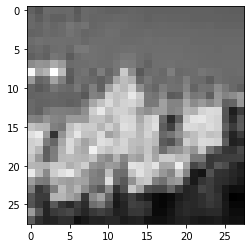

In [569]:
plt.imshow(x_train_images[1],cmap='gray')
print(x_train_images[1].shape)

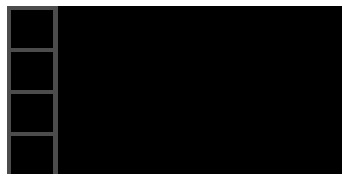

In [597]:

h,w = (28, 28)
new_image= Image.new('RGB', (h*8,w*4))

# Visualize ranks of the 10 queries
offset = 0 # it will show results from query #'offset' to #offset+10
for q in range(8):
  ranks_q = ranks[q*(offset+1),:]
  for i in range(4):
      new_image.paste(Image.fromarray(x_train_images[ranks_q[i]]), (h*(1+i),w*q))

  # visualize query
      ima_q = Image.fromarray(x_test_images[q*(offset+1)])
      ima_q = ImageOps.expand(ima_q, border=3, fill='red')

      new_image.paste(ima_q, (0,w*q))

plt.imshow(new_image)
plt.axis('off')
plt.show()
